## Pediatric Pneumonia Detection using Deep Learning

This project presents an end-to-end deep learning pipeline for detecting pediatric pneumonia from chest X-ray images. The goal is to build a binary image classification model that distinguishes between NORMAL and PNEUMONIA cases using transfer learning.

The workflow demonstrates how medical imaging data can be prepared, processed, and used to train a convolutional neural network for automated disease classification. This implementation is designed for educational and applied machine learning purposes, showcasing practical steps involved in building an AI-based diagnostic support system.
## Methodology and Workflow

The project follows a structured machine learning pipeline:

• Dataset Acquisition  
Chest X-ray images are automatically downloaded and organized for supervised learning.

• Data Preparation  
The dataset is divided into training, validation, and testing subsets. Images are resized, normalized, and augmented to improve model generalization.

• Model Development  
A pretrained convolutional neural network is used as a feature extractor, and custom classification layers are added for pneumonia detection.

• Model Evaluation  
The trained model is evaluated on unseen test data to assess its performance and generalization capability.

This workflow ensures systematic model development and fair performance assessment.

### 📂 Step 1 — Dataset Download using KaggleHub

In this step, we download the Pediatric Chest X-ray Pneumonia dataset directly from Kaggle using KaggleHub.
This method avoids manual upload and automatically stores the dataset in the Colab environment for further processing.


In [1]:
!pip install kagglehub

import kagglehub

path = kagglehub.dataset_download(
    "yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset"
)

print("Dataset Path:", path)


100%|██████████| 1.66G/1.66G [00:11<00:00, 154MB/s]

Extracting files...


Dataset Path: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1


### 📁 Step 2 — Understanding Dataset Structure

Here, we explore the dataset directory to verify its structure.
We check whether it contains Train, Validation, and Test folders along with their respective class subfolders (NORMAL and PNEUMONIA).


In [2]:
import os

os.listdir(path)


['NORMAL', 'PNEUMONIA']

### 📁 Step 2.1 — Exploring Complete Dataset Directory

In this step, we explore the full directory tree of the downloaded dataset to understand its internal folder hierarchy.
This helps us identify whether the dataset is already split into training, validation, and testing sets or if we need to perform the split manually.


In [3]:
for root, dirs, files in os.walk(path):
    print("Root:", root)
    print("Folders:", dirs)
    print("Files count:", len(files))
    print("-"*40)


Root: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1
Folders: ['NORMAL', 'PNEUMONIA']
Files count: 0
----------------------------------------
Root: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1/NORMAL
Folders: []
Files count: 4265
----------------------------------------
Root: /root/.cache/kagglehub/datasets/yusufmurtaza01/pediatric-chest-xray-pneumonia-balanced-dataset/versions/1/PNEUMONIA
Folders: []
Files count: 4265
----------------------------------------


### 📂 Step 3 — Dataset Splitting (Train / Validation / Test)

In this step, we split the dataset into three subsets: Training, Validation, and Testing.

Since the dataset is not pre-split, we manually divide the images into:

* 70% Training set
* 15% Validation set
* 15% Testing set

This ensures that the model is trained on one portion of the data and evaluated on unseen data for fair performance assessment.


In [4]:
import os
import shutil
import random


### 📁 Creating Directory Structure for Split Data

Here, we create a new directory structure to store the split datasets.
Each subset (Train, Validation, Test) will contain two class folders: NORMAL and PNEUMONIA.


In [5]:
base_dir = "/content/chest_xray_split"

folders = [
    "train/NORMAL",
    "train/PNEUMONIA",
    "val/NORMAL",
    "val/PNEUMONIA",
    "test/NORMAL",
    "test/PNEUMONIA"
]

for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)


### 🔀 Splitting Images into Train, Validation, and Test Sets

In this step, we randomly shuffle the images and divide them into training, validation, and testing subsets according to the defined ratios.


In [6]:
def split_data(source, train, val, test, split_ratio=(0.7, 0.15, 0.15)):

    images = os.listdir(source)
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratio[0] * total)
    val_end = int((split_ratio[0] + split_ratio[1]) * total)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    for img in train_imgs:
        shutil.copy(os.path.join(source, img), train)

    for img in val_imgs:
        shutil.copy(os.path.join(source, img), val)

    for img in test_imgs:
        shutil.copy(os.path.join(source, img), test)


### 🚀 Applying Dataset Splitting

Here, we apply the splitting function to both classes (Normal and Pneumonia) to generate the final dataset structure for model training and evaluation.


In [7]:
original_path = path

split_data(
    original_path + "/NORMAL",
    base_dir + "/train/NORMAL",
    base_dir + "/val/NORMAL",
    base_dir + "/test/NORMAL"
)

split_data(
    original_path + "/PNEUMONIA",
    base_dir + "/train/PNEUMONIA",
    base_dir + "/val/PNEUMONIA",
    base_dir + "/test/PNEUMONIA"
)

print("Dataset splitting completed ✅")


Dataset splitting completed ✅


### 📊 Verifying Dataset Split

In this step, we verify the number of images in each subset to ensure the dataset has been split correctly.


In [8]:
for root, dirs, files in os.walk(base_dir):
    print(root, "→", len(files))


/content/chest_xray_split → 0
/content/chest_xray_split/train → 0
/content/chest_xray_split/train/NORMAL → 2985
/content/chest_xray_split/train/PNEUMONIA → 2985
/content/chest_xray_split/val → 0
/content/chest_xray_split/val/NORMAL → 640
/content/chest_xray_split/val/PNEUMONIA → 640
/content/chest_xray_split/test → 0
/content/chest_xray_split/test/NORMAL → 640
/content/chest_xray_split/test/PNEUMONIA → 640


### 🖼 Step 4 — Visualizing Sample Chest X-ray Images

In this step, we display sample images from both classes (Normal and Pneumonia) to visually understand the dataset.

This helps in identifying visible differences between healthy and infected lungs and ensures that images are loaded correctly before training the model.


In [9]:
import matplotlib.pyplot as plt
import cv2
import os
import random


### 🔍 Displaying Random Samples from Each Class

Here, we randomly select images from both categories and display them for visual comparison.


In [10]:
def show_samples(class_path, title):

    images = os.listdir(class_path)
    sample_images = random.sample(images, 4)

    plt.figure(figsize=(10,5))

    for i, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1,4,i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")

    plt.show()


### 🫁 Normal Chest X-ray Samples

These images represent healthy lungs without pneumonia infection.


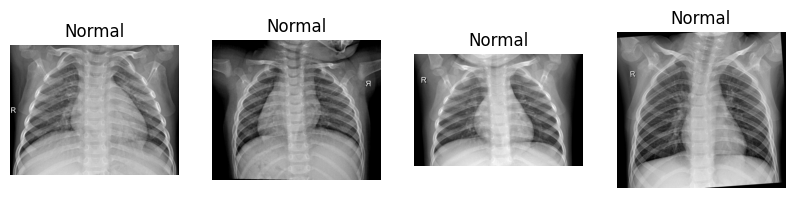

In [11]:
show_samples(
    base_dir + "/train/NORMAL",
    "Normal"
)


### 🦠 Pneumonia Chest X-ray Samples

These images represent lungs affected by pneumonia infection, showing visible opacities or abnormalities.


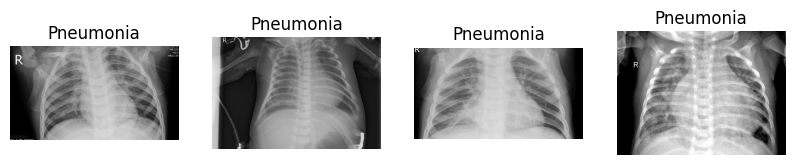

In [12]:
show_samples(
    base_dir + "/train/PNEUMONIA",
    "Pneumonia"
)


### 🧹 Step 5 — Image Preprocessing and Data Augmentation

In this step, we prepare the dataset for model training by applying preprocessing techniques.

The preprocessing includes:

* Rescaling pixel values (normalization)
* Resizing images to a fixed shape
* Applying augmentation techniques to the training set

Data augmentation helps improve model generalization and reduces overfitting by creating slightly modified variations of existing images.


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 🔄 Training Data Generator with Augmentation

Here, we apply augmentation techniques such as rotation, zoom, and horizontal flipping to artificially expand the training dataset and improve model robustness.


In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)


### 📏 Validation and Test Data Preprocessing

For validation and testing datasets, we only apply rescaling.

No augmentation is used here to ensure fair evaluation on real, unmodified images.


In [15]:
val_test_datagen = ImageDataGenerator(
    rescale=1./255
)


### 📥 Step 6 — Loading Images Using Data Generators

In this step, we load images from the split dataset directories using Keras data generators.

The images are resized to 224×224 pixels and converted into batches for efficient model training.


In [16]:
img_size = (224, 224)
batch_size = 32


In [17]:
train_data = train_datagen.flow_from_directory(
    base_dir + "/train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 5970 images belonging to 2 classes.


In [18]:
val_data = val_test_datagen.flow_from_directory(
    base_dir + "/val",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 1280 images belonging to 2 classes.


In [19]:
test_data = val_test_datagen.flow_from_directory(
    base_dir + "/test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 1280 images belonging to 2 classes.


### 🔎 Checking Class Indices

This step verifies how class labels are encoded by the generator.

Typically:

* Normal → 0
* Pneumonia → 1


In [20]:
train_data.class_indices


{'NORMAL': 0, 'PNEUMONIA': 1}

### 🧠 Step 7 — Building Transfer Learning Model (DenseNet121)

In this step, we build a deep learning model using the DenseNet121 architecture with pretrained ImageNet weights.

Transfer learning allows us to leverage previously learned features from large datasets, improving performance on medical imaging tasks such as pneumonia detection.


In [21]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models


### 📦 Loading Pretrained DenseNet121

Here, we load DenseNet121 without its top classification layer and use ImageNet pretrained weights for feature extraction.


In [22]:
base_model = DenseNet121(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### ❄ Freezing Base Model Layers

We freeze the convolutional base to prevent pretrained weights from updating during initial training.
This helps retain learned low-level image features.


In [23]:
base_model.trainable = False


### 🏗 Adding Custom Classification Layers

We add new fully connected layers on top of the pretrained base model to adapt it for binary pneumonia classification.


In [24]:
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(
    inputs=base_model.input,
    outputs=output
)


### ⚙ Compiling the Model

Here, we configure the model for training using:

* Adam optimizer
* Binary crossentropy loss
* Accuracy as evaluation metric


In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [26]:
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,168,833 (27.35 MB)

 Trainable params: 131,329 (513.00 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

### 🏋 Step 8 — Training the Transfer Learning Model

In this step, we train the DenseNet121-based transfer learning model using the prepared training and validation datasets.

The model learns to classify chest X-ray images as Normal or Pneumonia by optimizing its weights over multiple epochs.


In [27]:
epochs = 15


### ⏹ Using Callbacks for Efficient Training

Callbacks help improve training efficiency:

* **EarlyStopping** stops training when validation performance stops improving.
* **ModelCheckpoint** saves the best-performing model weights.

This prevents overfitting and preserves the optimal model.


In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True
)


### 🚀 Training the Model

Here, we train the model using the training dataset and validate it on the validation dataset to monitor performance.


In [29]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stop, checkpoint]
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 709ms/step - accuracy: 0.7934 - loss: 0.4605

187/187 ━━━━━━━━━━━━━━━━━━━━ 187s 850ms/step - accuracy: 0.7939 - loss: 0.4596 - val_accuracy: 0.9492 - val_loss: 0.1404
Epoch 2/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.9421 - loss: 0.1671

187/187 ━━━━━━━━━━━━━━━━━━━━ 134s 719ms/step - accuracy: 0.9421 - loss: 0.1671 - val_accuracy: 0.9516 - val_loss: 0.1256
Epoch 3/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 636ms/step - accuracy: 0.9426 - loss: 0.1555

187/187 ━━━━━━━━━━━━━━━━━━━━ 133s 709ms/step - accuracy: 0.9426 - loss: 0.1555 - val_accuracy: 0.9547 - val_loss: 0.1138
Epoch 4/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 130s 698ms/step - accuracy: 0.9391 - loss: 0.1579 - val_accuracy: 0.9523 - val_loss: 0.1152
Epoch 5/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.9539 - loss: 0.1284

187/187 ━━━━━━━━━━━━━━━━━━━━ 140s 745ms/step - accuracy: 0.9539 - loss: 0.1284 - val_accuracy: 0.9664 - val_loss: 0.1009
Epoch 6/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 133s 711ms/step - accuracy: 0.9604 - loss: 0.1156 - val_accuracy: 0.9594 - val_loss: 0.1044
Epoch 7/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 141s 708ms/step - accuracy: 0.9541 - loss: 0.1261 - val_accuracy: 0.9508 - val_loss: 0.1162
Epoch 8/15
187/187 ━━━━━━━━━━━━━━━━━━━━ 133s 711ms/step - accuracy: 0.9559 - loss: 0.1145 - val_accuracy: 0.9375 - val_loss: 0.1553


### 🧪 Step 10 — Evaluating Model on Test Dataset

In this step, we evaluate the trained model on the unseen test dataset to measure its real-world performance.

This ensures that the model generalizes well beyond the training data.


In [30]:
test_loss, test_accuracy = model.evaluate(test_data)

print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)


40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - accuracy: 0.9787 - loss: 0.0729
Test Accuracy: 0.9624999761581421
Test Loss: 0.10545533895492554


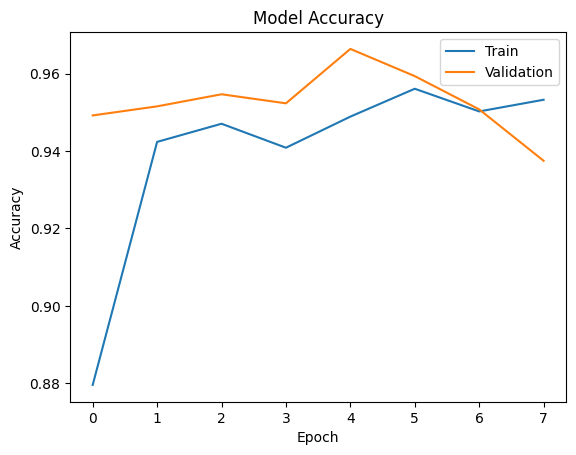

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()


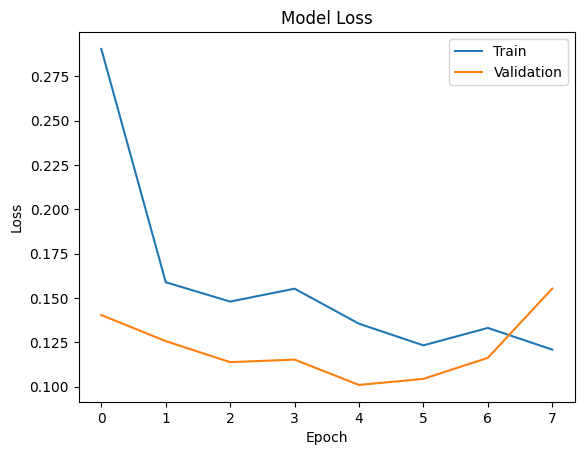

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.show()


### 📊 Step 11 — Generating Classification Report

Here, we compute precision, recall, and F1-score to better understand model performance, especially for medical diagnosis tasks.


In [33]:
import numpy as np
from sklearn.metrics import classification_report


In [34]:
predictions = model.predict(test_data)
pred_classes = (predictions > 0.5).astype("int32")

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())

print(classification_report(true_classes, pred_classes, target_names=class_labels))


40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 317ms/step
              precision    recall  f1-score   support

      NORMAL       0.94      0.98      0.96       640
   PNEUMONIA       0.98      0.94      0.96       640

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



### 🔲 Step 12 — Confusion Matrix Visualization

This step visualizes correct and incorrect predictions made by the model, helping identify false positives and false negatives.


In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


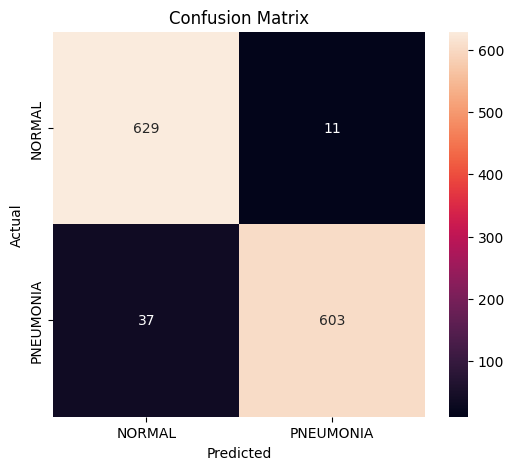

In [36]:
cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predictions
y_pred = model.predict(test_data)

# Convert probabilities → classes
y_pred_classes = (y_pred > 0.5).astype("int32").reshape(-1)

# Confusion Matrix
cm = confusion_matrix(test_data.classes, y_pred_classes)
print(cm)

# Classification Report
print(classification_report(
    test_data.classes,
    y_pred_classes,
    target_names=['NORMAL','PNEUMONIA']
))


40/40 ━━━━━━━━━━━━━━━━━━━━ 13s 316ms/step
[[629  11]
 [ 37 603]]
              precision    recall  f1-score   support

      NORMAL       0.94      0.98      0.96       640
   PNEUMONIA       0.98      0.94      0.96       640

    accuracy                           0.96      1280
   macro avg       0.96      0.96      0.96      1280
weighted avg       0.96      0.96      0.96      1280



### 💾 Step — Saving Trained Model

Is step me hum apna trained CNN model save karte hain taake future me bina dobara training ke use load karke prediction kar saken.

Model ko `.keras` format me save karna recommended hai (HDF5 legacy ho chuka hai).


In [38]:
# Save model in Keras format
model.save("pneumonia_cnn_model.keras")


### ⬇️ Step — Downloading Model File

Is step me hum saved model file ko Google Colab se apne computer me download karte hain.


In [39]:
from google.colab import files

files.download("pneumonia_cnn_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 🔮 Step — Model Prediction on New Image

In this step, we test our trained Pneumonia Detection model on a new unseen chest X-ray image.

First, we load the saved trained model. Then, we upload a new image and apply the same preprocessing steps used during training, including resizing the image to 224×224 pixels and rescaling pixel values.

Finally, the model predicts whether the uploaded X-ray image belongs to the **NORMAL** class or **PNEUMONIA** class.

This step demonstrates the real-world usability of our model for automatic pneumonia detection.


In [41]:
uploaded = files.upload()


Saving N X_ray.jfif to N X_ray.jfif


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


✅ Model Loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step


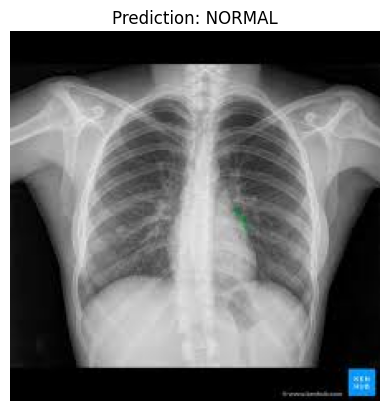

🩺 Model Prediction: NORMAL


In [45]:
# 1️⃣ Load Trained Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model("pneumonia_cnn_model.keras")
print("✅ Model Loaded")

# 2️⃣ Image Path (Already Uploaded)
img_path = "N X_ray.jfif"   # ← apni uploaded image ka exact naam likho

# 3️⃣ Load & Preprocess Image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 4️⃣ Prediction
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    result = "PNEUMONIA"
else:
    result = "NORMAL"

# 5️⃣ Show Result
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis("off")
plt.show()

print(f"🩺 Model Prediction: {result}")


In [46]:
uploaded = files.upload()


Saving P X ray.jfif to P X ray.jfif


✅ Model Loaded
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


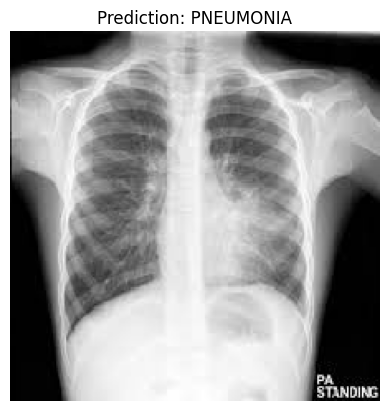

🩺 Model Prediction: PNEUMONIA


In [48]:
# 1️⃣ Load Trained Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model("pneumonia_cnn_model.keras")
print("✅ Model Loaded")

# 2️⃣ Image Path (Already Uploaded)
img_path = "P X ray.jfif"   # ← apni uploaded image ka exact naam likho

# 3️⃣ Load & Preprocess Image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)

img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# 4️⃣ Prediction
prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    result = "PNEUMONIA"
else:
    result = "NORMAL"

# 5️⃣ Show Result
plt.imshow(img)
plt.title(f"Prediction: {result}")
plt.axis("off")
plt.show()

print(f"🩺 Model Prediction: {result}")
